Saved: aruco_marker_0.png
Saved: aruco_marker_1.png
Saved: aruco_marker_2.png
Saved: aruco_marker_3.png


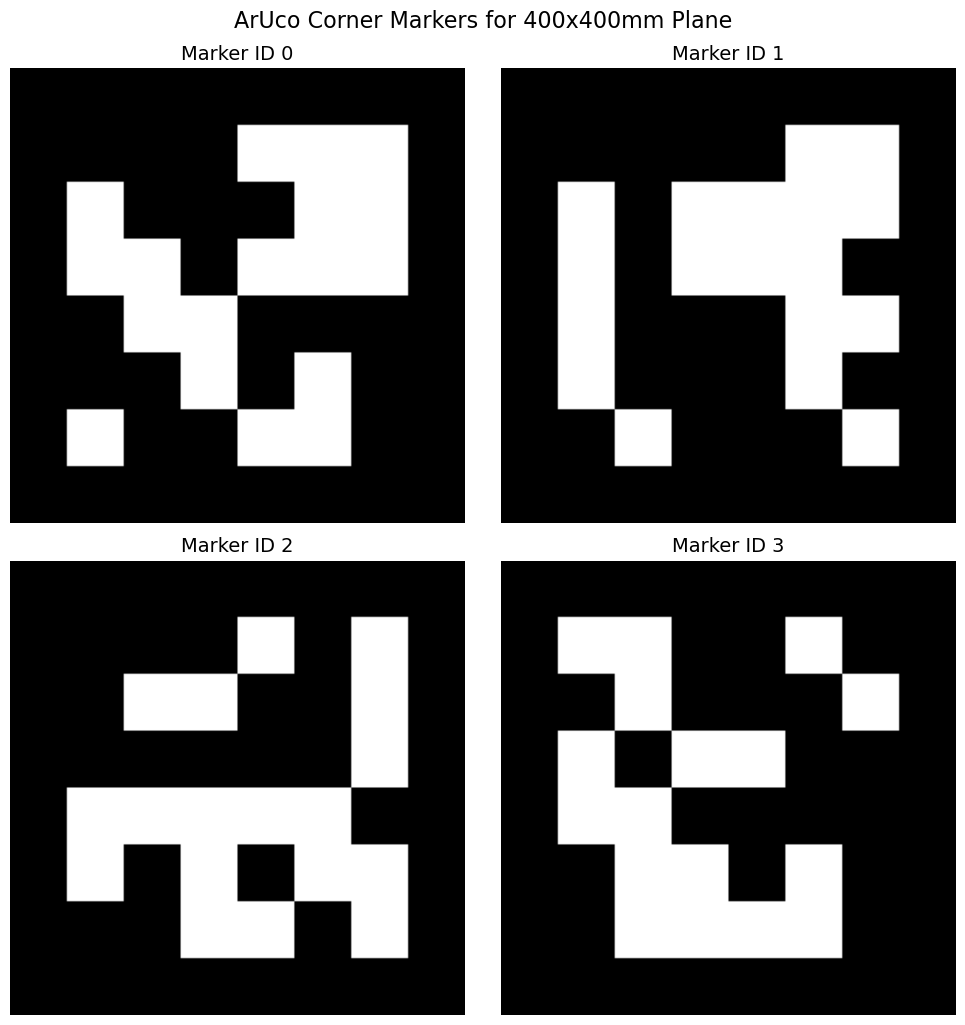


Marker assignment:
ID 0: Top-left corner
ID 1: Top-right corner
ID 2: Bottom-right corner
ID 3: Bottom-left corner


In [3]:
# ArUco four corner markers generation
# Add a function to save Marker images into a separate folder
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Select ArUco dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Define marker IDs for the four corners
# ID 0: Top-left, ID 1: Top-right, ID 2: Bottom-right, ID 3: Bottom-left
marker_ids = [0, 1, 2, 3]
marker_size = 200  # Size in pixels for generation

# Generate markers
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, marker_id in enumerate(marker_ids):
    # Generate marker image
    marker_image = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size)
    
    # Display marker
    axes[i].imshow(marker_image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Marker ID {marker_id}', fontsize=14)
    
    # Save marker as image file
    cv2.imwrite(f'aruco_marker_{marker_id}.png', marker_image)
    print(f'Saved: aruco_marker_{marker_id}.png')

plt.tight_layout()
plt.suptitle('ArUco Corner Markers for 400x400mm Plane', fontsize=16, y=1.02)
plt.show()

print("\nMarker assignment:")
print("ID 0: Top-left corner")
print("ID 1: Top-right corner")
print("ID 2: Bottom-right corner")
print("ID 3: Bottom-left corner")

Camera initialized successfully

=== INSTRUCTIONS ===
Press SPACEBAR to capture image
Press 'q' to quit without capturing

📸 Image captured!
Camera released
Frame captured successfully! Shape: (720, 1280, 3)


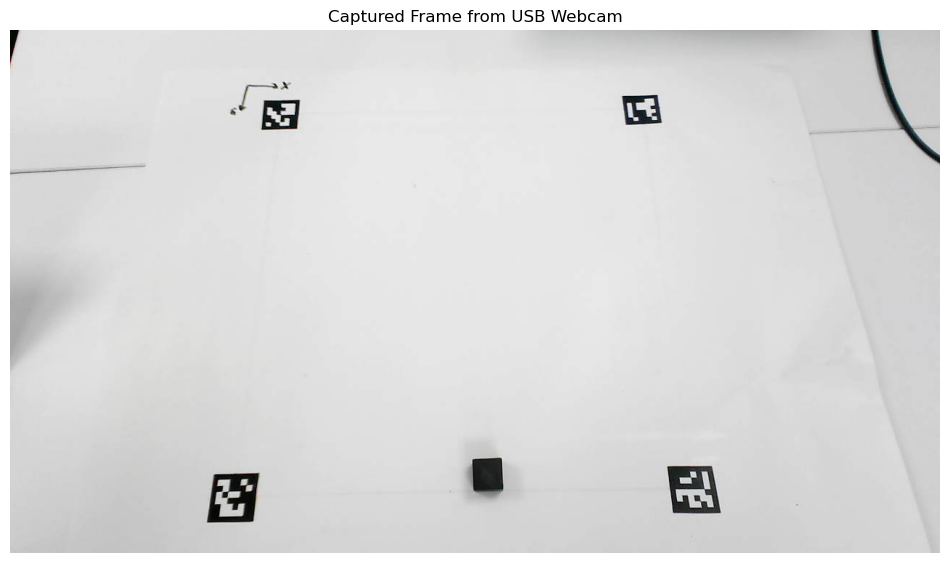

Frame saved as 'captured_frame.jpg'


In [20]:
# Image Acquisition/Capture a single frame
import cv2
import matplotlib.pyplot as plt

# Initialize camera (0 is usually the default camera, adjust if needed)
# Try index 0 first, if that doesn't work, try 1 or 2 for USB webcam
camera = cv2.VideoCapture(0)

# Set camera properties for better quality (optional)
camera.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

# Check if camera opened successfully
if not camera.isOpened():
    print("Error: Could not open camera")
    print("Try changing the camera index to 1 or 2")
else:
    print("Camera initialized successfully")
    print("\n=== INSTRUCTIONS ===")
    print("Press SPACEBAR to capture image")
    print("Press 'q' to quit without capturing")
    print("===================\n")
    
    # Allow camera to warm up
    for _ in range(10):
        camera.read()
    
    captured_image = None
    
    # Live preview loop
    while True:
        ret, frame = camera.read()
        
        if not ret:
            print("Error: Could not read frame from camera")
            break
        
        # Display live feed
        cv2.imshow('USB Webcam - Press SPACEBAR to capture', frame)
        
        # Wait for key press (1ms delay)
        key = cv2.waitKey(1) & 0xFF
        
        # Spacebar pressed (ASCII 32)
        if key == 32:
            captured_image = frame.copy()
            print("📸 Image captured!")
            break
        
        # 'q' pressed - quit without capturing
        elif key == ord('q'):
            print("Exiting without capture")
            break
    
    # Release camera and close preview window
    camera.release()
    cv2.destroyAllWindows()
    print("Camera released")
    
    # If image was captured, display and save it
    if captured_image is not None:
        print(f"Frame captured successfully! Shape: {captured_image.shape}")
        
        # Convert BGR to RGB for matplotlib display
        frame_rgb = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
        
        # Display the captured frame
        plt.figure(figsize=(12, 8))
        plt.imshow(frame_rgb)
        plt.title('Captured Frame from USB Webcam')
        plt.axis('off')
        plt.show()
        
        # Save the frame for processing 
        cv2.imwrite('captured_frame.jpg', captured_image)
        print("Frame saved as 'captured_frame.jpg'")
    else:
        print("No image was captured")

In [21]:
#Detect ArUco Markers
import cv2
import numpy as np

# Step 1: Load the Captured Image and convert to grayscale
captured_image = cv2.imread('captured_frame.jpg')
gray = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)

print("Image loaded and converted to grayscale")
print(f"Image shape: {gray.shape}")

Image loaded and converted to grayscale
Image shape: (720, 1280)


In [14]:
# Step 2: Initialize the ArUco Detector
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
aruco_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

print("ArUco detector initialized")
print(f"Dictionary: DICT_6X6_250")

ArUco detector initialized
Dictionary: DICT_6X6_250


Detection completed!

=== Detection Results ===
✓ Detected 4 marker(s)
Marker IDs: [3 2 0 1]
Marker ID 3: (306, 643) pixels
Marker ID 2: (939, 632) pixels
Marker ID 0: (372, 117) pixels
Marker ID 1: (869, 110) pixels


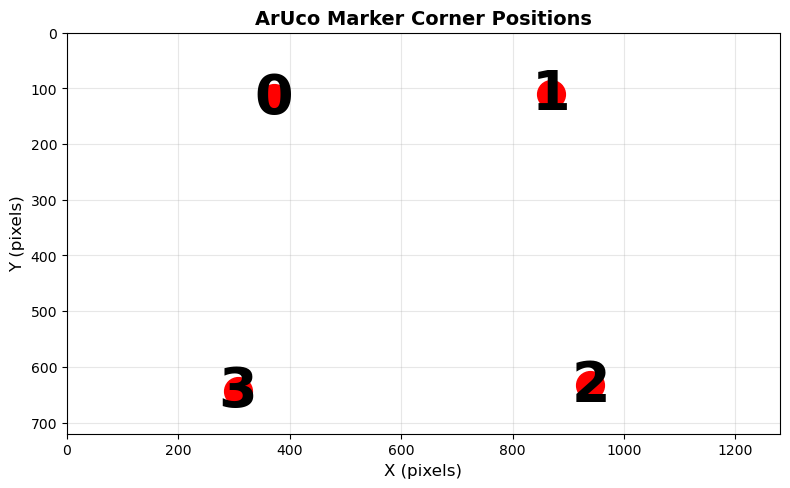


✅ All 4 corner markers detected!


In [22]:
# Step 3: Detect Markers and Show Simple Corner Plot
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Detect markers
try:
    corners, ids, rejected = detector.detectMarkers(gray)
    print("Detection completed!")
except Exception as e:
    print(f"Detection failed: {e}")
    # Try alternative method for older OpenCV
    corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)

# Display results
print(f"\n=== Detection Results ===")

if ids is not None:
    print(f"✓ Detected {len(ids)} marker(s)")
    print(f"Marker IDs: {ids.flatten()}")
    
    # Calculate marker centers
    marker_positions = {}
    for i, marker_id in enumerate(ids.flatten()):
        corner_points = corners[i][0]
        center_x = np.mean(corner_points[:, 0])
        center_y = np.mean(corner_points[:, 1])
        marker_positions[marker_id] = (center_x, center_y)
        print(f"Marker ID {marker_id}: ({int(center_x)}, {int(center_y)}) pixels")
    
    # Create simple plot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot each marker position with its ID
    for marker_id, (x, y) in marker_positions.items():
        ax.plot(x, y, 'ro', markersize=20)
        ax.text(x, y, f'{marker_id}', fontsize=40, ha='center', va='center', 
                color='black', fontweight='bold')
    
    # Set plot properties
    ax.set_xlim(0, gray.shape[1])
    ax.set_ylim(gray.shape[0], 0)  # Invert y-axis to match image coordinates
    ax.set_xlabel('X (pixels)', fontsize=12)
    ax.set_ylabel('Y (pixels)', fontsize=12)
    ax.set_title('ArUco Marker Corner Positions', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Check if all corners found
    if set(ids.flatten()) >= {0, 1, 2, 3}:
        print("\n✅ All 4 corner markers detected!")
    else:
        missing = {0, 1, 2, 3} - set(ids.flatten())
        print(f"\n⚠️ Missing markers: {missing}")
        
else:
    print("✗ No markers detected!")

In [23]:
# Step 4: Setup Perspective Transformation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Check if all 4 markers were detected
if ids is not None and set(ids.flatten()) >= {0, 1, 2, 3}:
    
    print("=== Setting up perspective transformation ===")
    
    # Extract marker centers in pixel coordinates
    src_points = []
    
    # Get centers for markers 0, 1, 2, 3 in order
    for marker_id in [0, 1, 2, 3]:
        if marker_id in marker_positions:
            src_points.append(marker_positions[marker_id])
    
    src_points = np.array(src_points, dtype=np.float32)
    
    # Define destination points in real-world coordinates (mm)
    # ID 0: Top-left (0, 0)
    # ID 1: Top-right (400, 0)
    # ID 2: Bottom-right (400, 400)
    # ID 3: Bottom-left (0, 400)
    dst_points = np.array([
        [0, 0],
        [400, 0],
        [400, 400],
        [0, 400]
    ], dtype=np.float32)
    
    # Calculate homography matrix
    homography_matrix, status = cv2.findHomography(src_points, dst_points)
    
    print("✅ Perspective transformation matrix calculated!")
    print(f"\nSource points (pixels):\n{src_points}")
    print(f"\nDestination points (mm):\n{dst_points}")
    print(f"\nHomography Matrix:\n{homography_matrix}")
    
else:
    print("❌ Cannot setup perspective transformation - not all 4 markers detected!")
    homography_matrix = None

=== Setting up perspective transformation ===
✅ Perspective transformation matrix calculated!

Source points (pixels):
[[372.   117.25]
 [869.25 110.25]
 [939.75 632.25]
 [306.75 643.75]]

Destination points (mm):
[[  0.   0.]
 [400.   0.]
 [400. 400.]
 [  0. 400.]]

Homography Matrix:
[[ 8.54649032e-01  1.05918042e-01 -3.30348330e+02]
 [ 1.45291568e-02  1.03208903e+00 -1.26417285e+02]
 [-4.98786579e-07  5.53429313e-04  1.00000000e+00]]


✅ Original image loaded


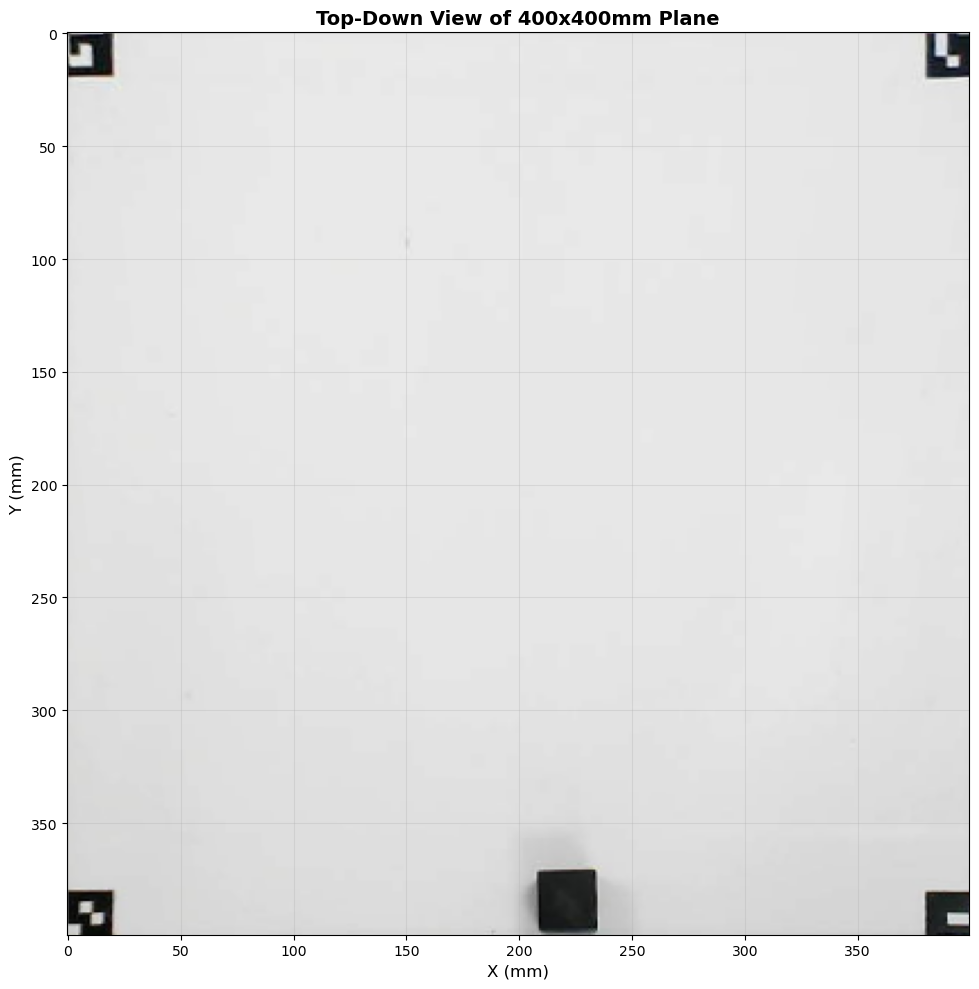

✅ Perspective transformation applied
   Image warped to 400x400 pixels (1 pixel = 1 mm)


In [24]:
# Step 5: Apply Perspective Warp to Get Top-Down View
import cv2
import numpy as np
import matplotlib.pyplot as plt

if homography_matrix is not None:
    
    # Load the original captured image
    original_image = cv2.imread('captured_frame.jpg')
    
    if original_image is None:
        print("❌ Error: Could not load 'captured_frame.jpg'")
    else:
        print("✅ Original image loaded")
        
        # Apply perspective warp to get top-down view (400x400 pixels = 400x400 mm)
        warped_image = cv2.warpPerspective(original_image, homography_matrix, (400, 400))
        
        # Convert to RGB for display
        warped_rgb = cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)
        
        # Display warped image
        plt.figure(figsize=(10, 10))
        plt.imshow(warped_rgb)
        plt.title('Top-Down View of 400x400mm Plane', fontsize=14, fontweight='bold')
        plt.xlabel('X (mm)', fontsize=12)
        plt.ylabel('Y (mm)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("✅ Perspective transformation applied")
        print("   Image warped to 400x400 pixels (1 pixel = 1 mm)")
        
else:
    print("❌ Cannot apply warp - homography matrix not available")

=== Detecting black objects ===
Threshold value: 50
Pixels below 50 are considered black


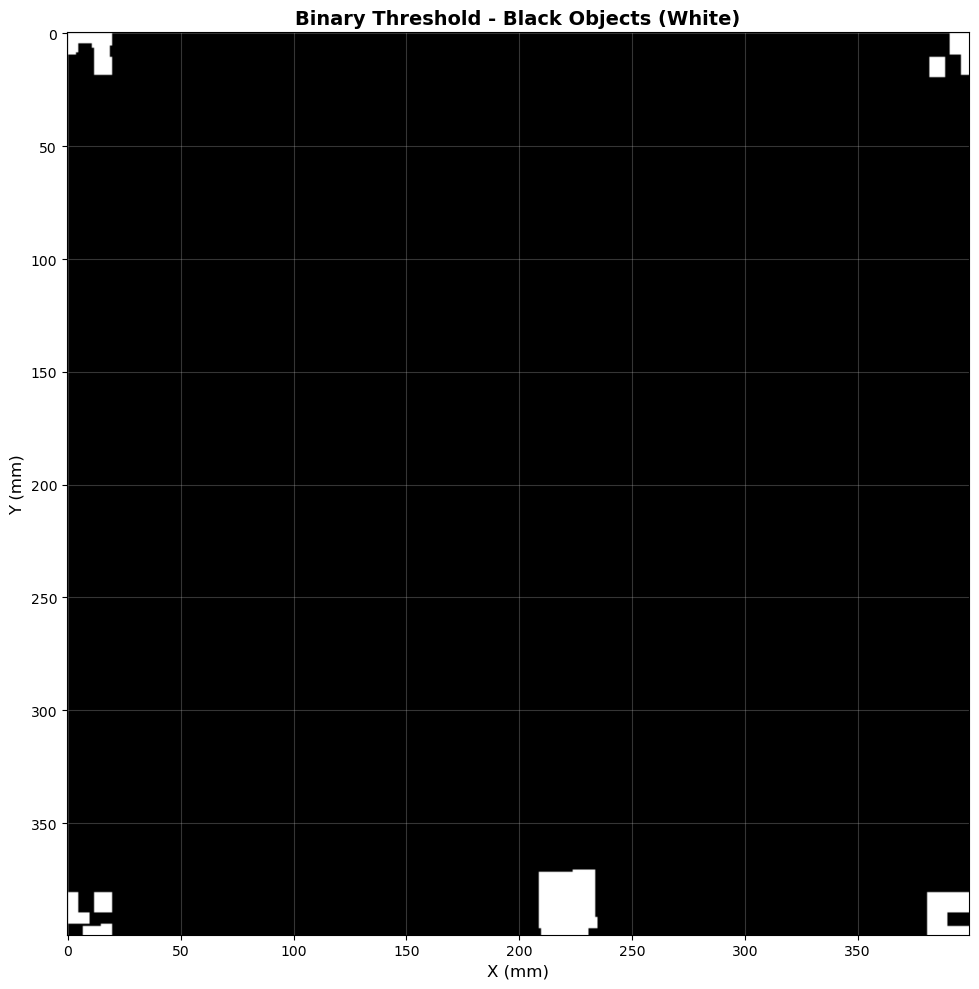

✅ Binary threshold applied


In [25]:
# Step 6: Apply Threshold to Detect Black Objects
import cv2
import numpy as np
import matplotlib.pyplot as plt

if 'warped_image' in locals():
    
    print("=== Detecting black objects ===")
    
    # Convert warped image to grayscale
    warped_gray = cv2.cvtColor(warped_image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary threshold to detect black objects
    # Black objects have LOW pixel values (close to 0)
    # Adjust threshold value if needed (currently set to 50)
    threshold_value = 50
    _, binary = cv2.threshold(warped_gray, threshold_value, 255, cv2.THRESH_BINARY_INV)
    
    print(f"Threshold value: {threshold_value}")
    print(f"Pixels below {threshold_value} are considered black")
    
    # Apply morphological operations to clean up noise
    kernel = np.ones((5, 5), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    # Display binary image
    plt.figure(figsize=(10, 10))
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Threshold - Black Objects (White)', fontsize=14, fontweight='bold')
    plt.xlabel('X (mm)', fontsize=12)
    plt.ylabel('Y (mm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("✅ Binary threshold applied")
    
else:
    print("❌ Warped image not available - run previous cell first")

In [26]:
# Step 7: Find Black Block and Calculate Centroid
import cv2
import numpy as np
import matplotlib.pyplot as plt

if 'binary' in locals():
    
    print("=== Finding contours ===")
    
    # Find contours
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    print(f"Found {len(contours)} contour(s)")
    
    if len(contours) > 0:
        # Find the largest contour (assumed to be the block)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate area to filter out noise
        area = cv2.contourArea(largest_contour)
        
        print(f"Largest contour area: {area:.2f} mm²")
        
        # Minimum area threshold (adjust as needed)
        min_area = 100
        
        if area > min_area:
            
            # Calculate moments to find centroid
            M = cv2.moments(largest_contour)
            
            if M["m00"] != 0:
                # Centroid coordinates in mm
                centroid_x = M["m10"] / M["m00"]
                centroid_y = M["m01"] / M["m00"]
                
                print(f"\n🎯 Block Centroid Location:")
                print(f"   X = {centroid_x:.2f} mm")
                print(f"   Y = {centroid_y:.2f} mm")
                print(f"   Area = {area:.2f} mm²")
                
                # Store centroid for later use
                block_centroid = (centroid_x, centroid_y)
                block_area = area
                block_contour = largest_contour
                
                print("\n✅ Block detected successfully!")
                
            else:
                print("⚠️ Could not calculate centroid (moment m00 is zero)")
                block_centroid = None
                
        else:
            print(f"⚠️ Detected object too small (area = {area:.2f} mm²)")
            print(f"   Minimum area threshold is {min_area} mm²")
            block_centroid = None
            
    else:
        print("❌ No contours detected!")
        print("Troubleshooting:")
        print("  - Ensure black block is placed on the plane")
        print("  - Check lighting - avoid shadows")
        print("  - Adjust threshold value in previous cell")
        block_centroid = None
        
else:
    print("❌ Binary image not available - run previous cell first")

=== Finding contours ===
Found 8 contour(s)
Largest contour area: 651.00 mm²

🎯 Block Centroid Location:
   X = 221.10 mm
   Y = 385.15 mm
   Area = 651.00 mm²

✅ Block detected successfully!


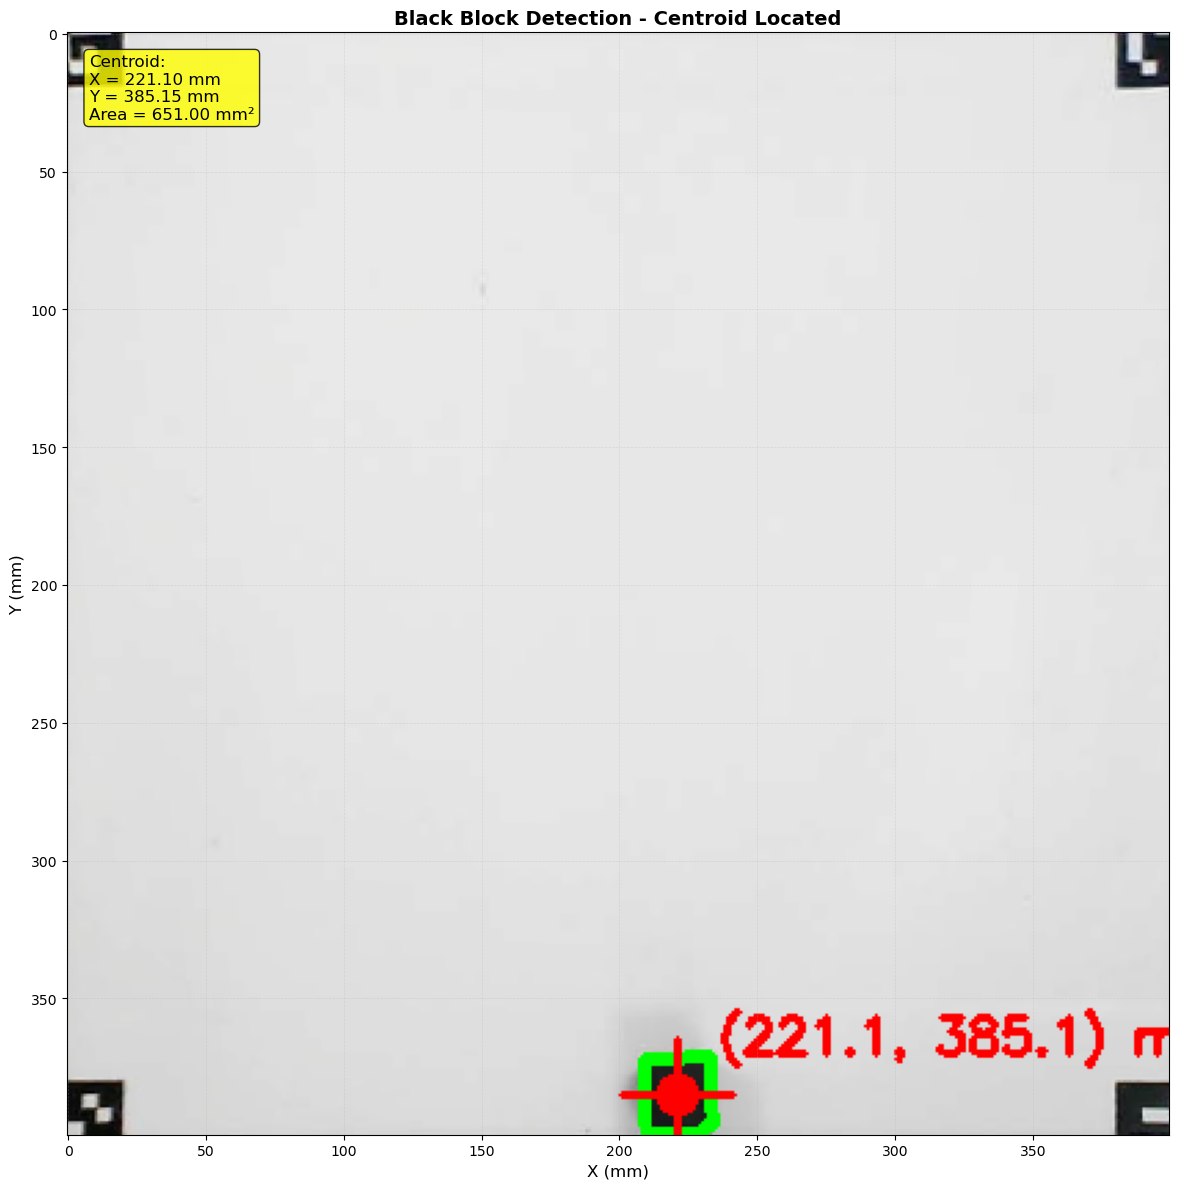

✅ Visualization complete!


In [27]:
# Step 8: Visualize Block Detection Results
import cv2
import numpy as np
import matplotlib.pyplot as plt

if 'block_centroid' in locals() and block_centroid is not None:
    
    centroid_x, centroid_y = block_centroid
    
    # Create result visualization
    result_image = warped_rgb.copy()
    
    # Draw contour (green outline)
    cv2.drawContours(result_image, [block_contour], -1, (0, 255, 0), 3)
    
    # Draw centroid (red dot)
    cv2.circle(result_image, (int(centroid_x), int(centroid_y)), 8, (255, 0, 0), -1)
    
    # Draw crosshair at centroid (red lines)
    cv2.line(result_image, (int(centroid_x) - 20, int(centroid_y)), 
            (int(centroid_x) + 20, int(centroid_y)), (255, 0, 0), 2)
    cv2.line(result_image, (int(centroid_x), int(centroid_y) - 20), 
            (int(centroid_x), int(centroid_y) + 20), (255, 0, 0), 2)
    
    # Add coordinate label
    label = f"({centroid_x:.1f}, {centroid_y:.1f}) mm"
    cv2.putText(result_image, label, 
               (int(centroid_x) + 15, int(centroid_y) - 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Display final result
    plt.figure(figsize=(12, 12))
    plt.imshow(result_image)
    plt.title('Black Block Detection - Centroid Located', fontsize=14, fontweight='bold')
    plt.xlabel('X (mm)', fontsize=12)
    plt.ylabel('Y (mm)', fontsize=12)
    
    # Add grid
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Add text box with coordinates
    textstr = f'Centroid:\nX = {centroid_x:.2f} mm\nY = {centroid_y:.2f} mm\nArea = {block_area:.2f} mm²'
    props = dict(boxstyle='round', facecolor='yellow', alpha=0.8)
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualization complete!")
    
else:
    print("❌ No block centroid available - block was not detected")
    print("   Run previous cells to detect the block first")

In [11]:
# Step 7: Find Black Block and Calculate Centroid (with 3D correction)
import cv2
import numpy as np
import matplotlib.pyplot as plt

if 'binary' in locals():
    
    print("=== Finding contours ===")
    
    # Find contours
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    print(f"Found {len(contours)} contour(s)")
    
    if len(contours) > 0:
        # Find the largest contour (assumed to be the block)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate area to filter out noise
        area = cv2.contourArea(largest_contour)
        
        print(f"Largest contour area: {area:.2f} mm²")
        
        # Minimum area threshold (adjust as needed)
        min_area = 100
        
        if area > min_area:
            
            # Calculate moments to find centroid
            M = cv2.moments(largest_contour)
            
            if M["m00"] != 0:
                # Centroid coordinates in mm (top surface center)
                centroid_x = M["m10"] / M["m00"]
                centroid_y = M["m01"] / M["m00"]
                
                # 3D block dimensions (1x1x1 inch = 25.4x25.4x25.4 mm)
                block_height_mm = 25.4
                
                # Calculate true 3D centroid
                # The top surface is at Z = block_height (sitting on plane at Z=0)
                # The 3D centroid is at Z = block_height / 2
                centroid_z = block_height_mm / 2  # 12.7 mm from the plane
                
                print(f"\n🎯 Block Top Surface Center (2D detection):")
                print(f"   X = {centroid_x:.2f} mm")
                print(f"   Y = {centroid_y:.2f} mm")
                
                print(f"\n🎯 Block 3D Centroid (accounting for height):")
                print(f"   X = {centroid_x:.2f} mm")
                print(f"   Y = {centroid_y:.2f} mm")
                print(f"   Z = {centroid_z:.2f} mm (above the plane)")
                print(f"   Area = {area:.2f} mm²")
                
                # Store both centroids
                block_centroid_2d = (centroid_x, centroid_y)
                block_centroid_3d = (centroid_x, centroid_y, centroid_z)
                block_area = area
                block_contour = largest_contour
                block_height = block_height_mm
                
                print("\n✅ Block detected successfully!")
                print(f"   Block height: {block_height_mm} mm")
                
            else:
                print("⚠️ Could not calculate centroid (moment m00 is zero)")
                block_centroid_2d = None
                block_centroid_3d = None
                
        else:
            print(f"⚠️ Detected object too small (area = {area:.2f} mm²)")
            print(f"   Minimum area threshold is {min_area} mm²")
            block_centroid_2d = None
            block_centroid_3d = None
            
    else:
        print("❌ No contours detected!")
        print("Troubleshooting:")
        print("  - Ensure black block is placed on the plane")
        print("  - Check lighting - avoid shadows")
        print("  - Adjust threshold value in previous cell")
        block_centroid_2d = None
        block_centroid_3d = None
        
else:
    print("❌ Binary image not available - run previous cell first")

=== Finding contours ===
Found 7 contour(s)
Largest contour area: 336.50 mm²

🎯 Block Top Surface Center (2D detection):
   X = 380.94 mm
   Y = 154.09 mm

🎯 Block 3D Centroid (accounting for height):
   X = 380.94 mm
   Y = 154.09 mm
   Z = 12.70 mm (above the plane)
   Area = 336.50 mm²

✅ Block detected successfully!
   Block height: 25.4 mm
